# Video 3 - Bagging

In [26]:
import pandas as pd

## Data Exploration

In [27]:
train_df = pd.read_csv('train.csv')
train_df.head(3)

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,3260.0,24.703605,1498,Makeup,82.0,64.0,180.0,353.0,1859.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3729.0,22.226514,1139,Makeup,31.0,15.0,41.0,42.0,180.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2675.0,25.574468,1269,Makeup,19.0,14.0,37.0,54.0,269.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:
val_df = pd.read_csv('validation.csv')
val_df.head(3)

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,3046.0,22.430288,416,Hair Care,46.0,41.0,102.0,200.0,1248.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
1,6452.0,20.758466,1565,Makeup,59.0,43.0,78.0,163.0,950.0,16.0,...,0.0,0.0,0.000000,0.0,0.0,6375.0,77040.81,7539723.0,2.0,1
2,4666.0,25.025785,892,Skincare,112.0,88.0,274.0,529.0,3619.0,12.0,...,0.0,948.0,2993.821631,146428.0,4.0,0.0,0.00,0.0,0.0,0


In [29]:
train_df = train_df.drop('Units_sold', axis=1)
train_df.head()

,Page_traffic,Unit_price,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,3260.0,24.703605,Makeup,82.0,64.0,180.0,353.0,1859.0,11.0,6.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3729.0,22.226514,Makeup,31.0,15.0,41.0,42.0,180.0,8.0,8.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2675.0,25.574468,Makeup,19.0,14.0,37.0,54.0,269.0,9.0,8.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,6281.0,20.971065,Makeup,25.0,18.0,62.0,107.0,532.0,0.0,6.0,...,408.036474,917.0,2654.489552,133688.0,4.0,5744.0,63978.2,6594469.0,2.0,1
4,131.0,20.099526,Skincare,23.0,21.0,45.0,91.0,559.0,16.0,7.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
val_df = val_df.drop('Units_sold', axis=1)
val_df.head()

,Page_traffic,Unit_price,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,3046.0,22.430288,Hair Care,46.0,41.0,102.0,200.0,1248.0,0.0,6.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
1,6452.0,20.758466,Makeup,59.0,43.0,78.0,163.0,950.0,16.0,8.0,...,0.0,0.0,0.000000,0.0,0.0,6375.0,77040.81,7539723.0,2.0,1
2,4666.0,25.025785,Skincare,112.0,88.0,274.0,529.0,3619.0,12.0,6.0,...,0.0,948.0,2993.821631,146428.0,4.0,0.0,0.00,0.0,0.0,0
3,1733.0,31.328486,Hair Care,72.0,54.0,97.0,250.0,1652.0,11.0,6.0,...,0.0,711.0,2241.699378,147418.0,2.0,0.0,0.00,0.0,0.0,1
4,4658.0,13.746230,Hair Care,0.0,0.0,0.0,0.0,0.0,7.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1


In [31]:
#Storing the ratio in a list named Rating_ratio
Rating_ratio = []
for row in train_df.values:
    if(row[3]+row[4] == 0):
        if(row[6]+row[7] == 0):
            #If all the ratings are zero then overall rating ratio will also be zero
            Rating_ratio.append(0.0)
        else:
            #If only the numerator(1 and 2 star) ratings are zero then add -99999 to the list temporarily which 
            #will be taken care of in the next part of the code
            Rating_ratio.append(-99999)
    else:
        Rating_ratio.append((int(row[6])+int(row[7]))/(int(row[4])+int(row[3])));
              

#replacing -99999 with the maximum rating in the list
max_rating = max(Rating_ratio)
for x in range(len(Rating_ratio)):
    if(Rating_ratio[x] == -99999):
        Rating_ratio[x] = max_rating

#adding the column 'Good_By_Bad_Rating' to the dataframe
train_df['Good_By_Bad_Rating'] = Rating_ratio

#drop the rating columns
train_df.drop(columns = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating'], inplace = True)

#check the dataset
train_df.head().transpose()


,0,1,2,3,4
Page_traffic,3260.0,3729.0,2675.0,6281.0,131.0
Unit_price,24.703605,22.226514,25.574468,20.971065,20.099526
Segment,Makeup,Makeup,Makeup,Makeup,Skincare
Image_Count,11.0,8.0,9.0,0.0,16.0
Bullet_Count,6.0,8.0,8.0,6.0,7.0
Title_Count,67.0,126.0,126.0,77.0,140.0
Description_Length,125.0,221.0,221.0,98.0,139.0
num_unique_Search_Terms,5.0,10.0,0.0,3.0,0.0
Organic Search Rank,4.0,22.0,29.0,18.0,18.0
Num_of_Promotions,0.0,0.0,0.0,1.0,0.0


In [32]:

#Storing the ratio in a list named Rating_ratio
Rating_ratio = []
for row in val_df.values:
    if(row[3]+row[4] == 0):
        if(row[6]+row[7] == 0):
            #If all the ratings are zero then overall rating ratio will also be zero
            Rating_ratio.append(0.0)
        else:
            #If only the numerator(1 and 2 star) ratings are zero then add -99999 to the list temporarily which 
            #will be taken care of in the next part of the code
            Rating_ratio.append(-99999)
    else:
        Rating_ratio.append((int(row[6])+int(row[7]))/(int(row[4])+int(row[3])));
              

#replacing -99999 with the maximum rating in the list
max_rating = max(Rating_ratio)
for x in range(len(Rating_ratio)):
    if(Rating_ratio[x] == -99999):
        Rating_ratio[x] = max_rating

#adding the column 'Good_By_Bad_Rating' to the dataframe
val_df['Good_By_Bad_Rating'] = Rating_ratio

#drop the rating columns
val_df.drop(columns = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating'], inplace = True)

#check the dataset
val_df.head().transpose()


,0,1,2,3,4
Page_traffic,3046.0,6452.0,4666.0,1733.0,4658.0
Unit_price,22.430288,20.758466,25.025785,31.328486,13.74623
Segment,Hair Care,Makeup,Skincare,Hair Care,Hair Care
Image_Count,0.0,16.0,12.0,11.0,7.0
Bullet_Count,6.0,8.0,6.0,6.0,5.0
Title_Count,81.0,162.0,92.0,93.0,84.0
Description_Length,105.0,158.0,184.0,61.0,58.0
num_unique_Search_Terms,0.0,5.0,9.0,4.0,0.0
Organic Search Rank,23.0,37.0,24.0,32.0,18.0
Num_of_Promotions,0.0,0.0,0.0,0.0,0.0


## Encoding Categorical variables

In [33]:
#one-hot encoding
train_df = pd.get_dummies(train_df, columns = ['Segment'], prefix = 'Segment', drop_first = True)
val_df = pd.get_dummies(val_df, columns = ['Segment'], prefix = 'Segment', drop_first = True)

In [34]:
from sklearn.model_selection import train_test_split

y_train = train_df['Units_sold>1000']Video 5 - Understand Out-Of-Bag Score
Our goal over here is to understand how the performance of a Random Forest classifier varies with different numbers of trees in the forest (n_estimators). Here, we are going to try to find the optimal number of trees that yields the best performance based on the out of bag score. Further we will visualize the performance on the training set and the out of bag score to find the optimal range of n_estimators. Let's look at how we do it.

Firstly let's quickly import the required libraries to perform this operation and create the random forest classifier.

from sklearn.ensemble import RandomForestClassifier
import numpy as np
​
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)
Here, the RandomForestClassifier is created and assigned to the variable clf. We've also set the oob_score=True so this enables the calculation of the Out-Of-Bag (OOB) score. As we discussed earlier, it uses a subset of the training data that was not used in the construction of the individual trees for validation

Next, let's set the range of n_estimators to compare the oob scores against. Here we are going to view the scores from 10 to 200 estimators in steps of 10 estimators. Further we shall store the train_scores in a list seperately and the oob scores for the validation seperately.

# Range of `n_estimators` values to explore
n_estimators_range = range(10, 210, 10)
​
# Lists to store OOB scores and train scores
train_scores = []
oob_scores_val = []
Finally, let's go ahead and print the scores using a for loop. Take a look at the code

# Assuming you have X_train and y_train for training
print(f"{'n_estimators':<15} {'Train Score':<15} {'OOB Score'}")
for n_estimators in n_estimators_range:
    clf.set_params(n_estimators=n_estimators, max_depth=20, min_samples_leaf=10)
    clf.fit(X_train, y_train)
​
    # Calculate scores and append to lists
    train_score = clf.score(X_train, y_train)
    train_scores.append(train_score)
    
    oob_score_val = clf.oob_score_
    oob_scores_val.append(oob_score_val)
​
    # Print in a formatted way
    print(f"{n_estimators:<15} {train_score:<15.4f} {oob_score_val:.4f}")
​
# Output header
n_estimators    Train Score     OOB Score
10              0.8881          0.8110
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
20              0.8905          0.8272
30              0.8919          0.8329
40              0.8921          0.8360
50              0.8941          0.8389
60              0.8932          0.8389
70              0.8933          0.8400
80              0.8938          0.8404
90              0.8948          0.8388
100             0.8946          0.8397
110             0.8948          0.8402
120             0.8943          0.8395
130             0.8943          0.8408
140             0.8961          0.8410
150             0.8954          0.8414
160             0.8958          0.8411
170             0.8958          0.8422
180             0.8956          0.8422
190             0.8956          0.8432
200             0.8958          0.8430
Now that we've successfully obtained the scores, let's quickly plot train and oob score vs number of estimators.

import matplotlib.pyplot as plt
​
# Plotting
plt.figure(figsize=(7, 5))
plt.plot(n_estimators_range, train_scores, label='Train Score')
plt.plot(n_estimators_range, oob_scores_val, label='OOB Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Train and OOB Scores vs Number of Estimators')
plt.yticks(np.arange(0.7, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()
​

Here we can see that, Intially when the number of estimators is less, the gap between oob score and train score is high indicating overfitting. As we increase the number of trees to 50 the model overcomes overfitting. Aditionally, increasing the estimators beyong 50 does not give us further improvement. So in this scenario going with 50 estimators will be sufficient.


X_train = train_df.drop('Units_sold>1000', axis=1)

In [35]:
y_validation = val_df['Units_sold>1000']
X_validation = val_df.drop('Units_sold>1000', axis=1)

## Training a Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_validation)

In [38]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred_train)
print(f"F1 Score on Train: {round(f1*100, 2)}%")

f1 = f1_score(y_validation, y_pred_val)
print(f"F1 Score on Validation: {round(f1*100, 2)}%")

F1 Score on Train: 100.0%
F1 Score on Validation: 83.64%


In [39]:
model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_validation)

In [40]:
f1 = f1_score(y_train, y_pred_train)
print(f"F1 Score on Train: {round(f1*100, 2)}%")

f1 = f1_score(y_validation, y_pred_val)
print(f"F1 Score on Validation: {round(f1*100, 2)}%")

F1 Score on Train: 89.71%
F1 Score on Validation: 83.61%


## Applying the Concept of Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [55]:

# Create a decision tree weak learner
base_classifier = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, 
                                        random_state=42)
# base_classifier = KNeighborsClassifier()
# base_classifier = LogisticRegression()

# Create a BaggingClassifier using decision tree as the base estimator
bagging_classifier = BaggingClassifier(base_classifier,
                                       n_estimators=101,
                                       random_state=42, n_jobs=-1)
# Fit the BaggingClassifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   min_samples_leaf=10,
                                                   random_state=42),
                  n_estimators=101, n_jobs=-1, random_state=42)

In [56]:
# Predict on the validation data
predictions_train = bagging_classifier.predict(X_train)
predictions_val = bagging_classifier.predict(X_validation)

In [57]:
f1 = f1_score(y_train, predictions_train)
print(f"F1 Score Train: {round(f1*100, 2)}%")

F1 Score Train: 92.71%


In [58]:
f1 = f1_score(y_validation, predictions_val)
print(f"F1 Score Validation: {round(f1*100, 2)}%")

F1 Score Validation: 87.52%


#### Run all cells above to complete the initial steps

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier model instance
rf_classifier = RandomForestClassifier(max_depth=20, min_samples_leaf=10, random_state=42, n_estimators=101, n_jobs=-1)

# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on training data
y_train_pred = rf_classifier.predict(X_train)

In [60]:
# Calculate F1 score for training data
f1_train = f1_score(y_train, y_train_pred)

# Print the F1 scores
print(f"F1 Score Train: {round(f1_train*100, 2)}%")

F1 Score Train: 91.49%


In [61]:
# Predict on validation data
y_validation_pred = rf_classifier.predict(X_validation)

# Calculate F1 score for validation data
f1_validation = f1_score(y_validation, y_validation_pred)

print(f"F1 Score Validation: {round(f1_validation*100, 2)}%")

F1 Score Validation: 88.07%


# Video 5  - Understanding Out-Of-Bag Score

__Run all cells above to complete the initial steps__

In [63]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)

In [64]:
# Range of `n_estimators` values to explore
n_estimators_range = range(10, 210, 10)

# Lists to store OOB scores and train scores
train_scores = []
oob_scores_val = []

In [65]:
# Assuming you have X_train and y_train for training
print(f"{'n_estimators':<15} {'Train Score':<15} {'OOB Score'}")
for n_estimators in n_estimators_range:
    clf.set_params(n_estimators=n_estimators, max_depth=20, min_samples_leaf=10)
    clf.fit(X_train, y_train)

    # Calculate scores and append to lists
    train_score = clf.score(X_train, y_train)
    train_scores.append(train_score)
    
    oob_score_val = clf.oob_score_
    oob_scores_val.append(oob_score_val)

    # Print in a formatted way
    print(f"{n_estimators:<15} {train_score:<15.4f} {oob_score_val:.4f}")

# Output header

n_estimators    Train Score     OOB Score
10              0.8881          0.8110


C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


20              0.8905          0.8272
30              0.8919          0.8329
40              0.8921          0.8360
50              0.8941          0.8389
60              0.8932          0.8389
70              0.8933          0.8400
80              0.8938          0.8404
90              0.8948          0.8388
100             0.8946          0.8397
110             0.8948          0.8402
120             0.8943          0.8395
130             0.8943          0.8408
140             0.8961          0.8410
150             0.8954          0.8414
160             0.8958          0.8411
170             0.8958          0.8422
180             0.8956          0.8422
190             0.8956          0.8432
200             0.8958          0.8430


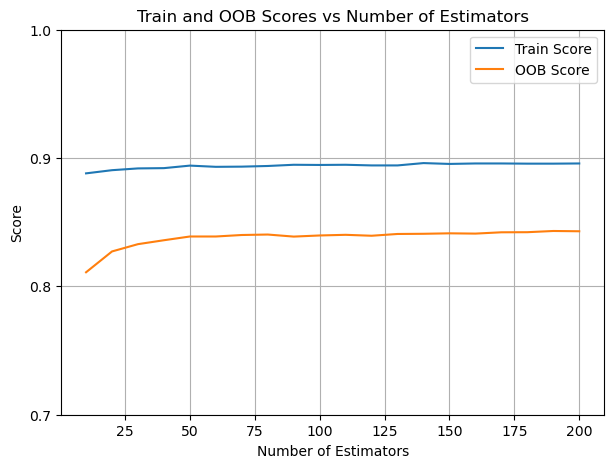

In [66]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(n_estimators_range, train_scores, label='Train Score')
plt.plot(n_estimators_range, oob_scores_val, label='OOB Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Train and OOB Scores vs Number of Estimators')
plt.yticks(np.arange(0.7, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()
